In [1]:
import os
os.environ["KERAS_BACKEND"] = "theano"

from __future__ import print_function
from keras.utils import np_utils
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import PIL
from PIL import Image, ImageFilter
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional_recurrent import ConvLSTM2D
import requests
from io import BytesIO

Using Theano backend.


In [2]:
batch_size = 128
nb_classes = 10
nb_epoch = 50

# input image dimensions
img_rows, img_cols = 100, 100
# number of convolutional filters to use
nb_filters = 1
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

In [3]:
X_train_data = np.random.random((1,6,1, img_rows, img_cols))
Y_train_data = np.random.random((1,6,1, img_rows, img_cols))

with open("../../Environment/Informations/Category/Portraits/trainImages/images.txt") as f:
    infoFileContents = f.readlines()
    for l in range(len(infoFileContents)):
        infoLine = infoFileContents[l].lstrip().rstrip()
        
        print (infoLine)
        response = requests.get(infoLine)
        trainInpImg = Image.open(BytesIO(response.content))
        trainInpGrayImg = trainInpImg.convert("L")
        trainInpGrayImg = trainInpGrayImg.resize((img_rows,img_cols), PIL.Image.ANTIALIAS)
        trainInpGreyImgArray = np.asarray(trainInpGrayImg, dtype=np.float32)
        Y_train_data[0,l,0,:,:] = trainInpGreyImgArray
        
        trainInpEdgeImg = trainInpImg.convert("L")
        trainInpEdgeImg = trainInpEdgeImg.resize((img_rows,img_cols), PIL.Image.ANTIALIAS)
        trainInpEdgeImg = trainInpEdgeImg.filter(ImageFilter.FIND_EDGES)

        trainInpEdgeImgArray = np.asarray(trainInpEdgeImg, dtype=np.float32)
        X_train_data[0,l,0,:,:] = trainInpEdgeImgArray

X_test_data = np.random.random((1,2,1, img_rows, img_cols))
Y_test_data = np.random.random((1,2,1, img_rows, img_cols))        

with open("../../Environment/Informations/Category/Portraits/testImages/images.txt") as f:
    infoFileContents = f.readlines()
    for l in range(len(infoFileContents)):
        infoLine = infoFileContents[l].lstrip().rstrip()
        
        print (infoLine)
        response = requests.get(infoLine)
        trainInpImg = Image.open(BytesIO(response.content))
        trainInpGrayImg = trainInpImg.convert("L")
        trainInpGrayImg = trainInpGrayImg.resize((img_rows,img_cols), PIL.Image.ANTIALIAS)
        trainInpGreyImgArray = np.asarray(trainInpGrayImg, dtype=np.float32)
        Y_test_data[0,l,0,:,:] = trainInpGreyImgArray
        
        trainInpEdgeImg = trainInpImg.convert("L")
        trainInpEdgeImg = trainInpEdgeImg.resize((img_rows,img_cols), PIL.Image.ANTIALIAS)
        trainInpEdgeImg = trainInpEdgeImg.filter(ImageFilter.FIND_EDGES)
        trainInpEdgeImgArray = np.asarray(trainInpEdgeImg, dtype=np.float32)
        X_test_data[0,l,0,:,:] = trainInpEdgeImgArray
        

http://www.loc.gov/rr/scitech/subjectguides/images/tesla-new.jpg
https://static1.squarespace.com/static/51cdd10de4b08819bd7bc9b4/525d89c2e4b0f8245cabfc96/53cfd660e4b089801fe7e3d9/1458152617516/SciSource_BK0929.jpg?format=750w
https://static1.squarespace.com/static/51cdd10de4b08819bd7bc9b4/525d89c2e4b0f8245cabfc96/53cfd28be4b0c47638e2f540/1458152692173/SciSource_BN4337.jpg?format=750w
https://static1.squarespace.com/static/51cdd10de4b08819bd7bc9b4/525d89c2e4b0f8245cabfc96/53cfd532e4b0141d9ac95e95/1458152729573/SciSource_BK0945.jpg?format=750w
https://static1.squarespace.com/static/51cdd10de4b08819bd7bc9b4/525d89c2e4b0f8245cabfc96/5400dbd4e4b0fc8cd2ef213e/1458152745999/SciSource_BU1440.jpg?format=750w


In [4]:
X_train_data = X_train_data.astype('float32')
X_train_data /= 255
print('X_train shape:', X_train_data.shape)
print(X_train_data.shape[0], 'train samples')
Y_train_data = Y_train_data.astype('float32')
Y_train_data /= 255
print('Y_train shape:', Y_train_data.shape)
print(Y_train_data.shape[0], 'train samples')

X_train shape: (1L, 6L, 1L, 100L, 100L)
1 train samples
Y_train shape: (1L, 6L, 1L, 100L, 100L)
1 train samples


In [5]:
if K.image_dim_ordering() == 'th':
    input_shape = (None, 1, img_rows, img_cols)
else:
    input_shape = (None, img_rows, img_cols, 1)

In [6]:
model = Sequential()

model.add(ConvLSTM2D(nb_filters*100, kernel_size[0], kernel_size[1],
                        border_mode='same',
                        input_shape=input_shape, return_sequences=True))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(ConvLSTM2D(nb_filters*100, kernel_size[0], kernel_size[1],
                         border_mode='same',
                         input_shape=input_shape, return_sequences=True))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(ConvLSTM2D(nb_filters*100, kernel_size[0], kernel_size[1],
                         border_mode='same',
                         input_shape=input_shape, return_sequences=True))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(ConvLSTM2D(nb_filters*100, kernel_size[0], kernel_size[1],
                         border_mode='same',
                         input_shape=input_shape, return_sequences=True))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(ConvLSTM2D(nb_filters, kernel_size[0], kernel_size[1],
                         border_mode='same',
                         input_shape=input_shape, return_sequences=True))
model.add(Activation('relu'))

C:\Users\rames\Anaconda2\lib\site-packages\keras\layers\convolutional_recurrent.py:280: UserWarning: Be carefull if used with convolution3D layers:
th in convolution 3D corresponds to (samples, channels, conv_dim1, conv_dim2,conv_dim3)
while for this network it corresponds to: (samples, time, channels, rows, cols)
  warnings.warn('Be carefull if used with convolution3D layers:\n'
C:\Users\rames\Anaconda2\lib\site-packages\keras\engine\topology.py:379: UserWarning: The `regularizers` property of layers/models is deprecated. Regularization losses are now managed via the `losses` layer/model property.
  warnings.warn('The `regularizers` property of layers/models '


In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adadelta')

In [8]:
model.fit(X_train_data, Y_train_data, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test_data, Y_test_data))

Train on 1 samples, validate on 1 samples
Epoch 1/50
1/1 [==============================] - 37s - loss: 3.1722 - val_loss: 1266.3553
Epoch 2/50
1/1 [==============================] - 39s - loss: 1.5087 - val_loss: 1153.3278
Epoch 3/50
1/1 [==============================] - 42s - loss: 1.4318 - val_loss: 1079.1110
Epoch 4/50
1/1 [==============================] - 36s - loss: 1.3763 - val_loss: 1014.8133
Epoch 5/50
1/1 [==============================] - 37s - loss: 1.3295 - val_loss: 954.4838
Epoch 6/50
1/1 [==============================] - 39s - loss: 1.2858 - val_loss: 896.1168
Epoch 7/50
1/1 [==============================] - 40s - loss: 1.2439 - val_loss: 839.5942
Epoch 8/50
1/1 [==============================] - 36s - loss: 1.2030 - val_loss: 784.8791
Epoch 9/50
1/1 [==============================] - 35s - loss: 1.1629 - val_loss: 732.5497
Epoch 10/50
1/1 [==============================] - 34s - loss: 1.1255 - val_loss: 683.4901
Epoch 11/50
1/1 [==============================] - 34

In [9]:
score = model.evaluate(X_train_data, Y_train_data, verbose=0)
print('Test score:', score)
print('Test accuracy:', score)

Test score: 0.437286674976
Test accuracy: 0.437286674976


In [10]:
pred_data = model.predict(X_test_data)

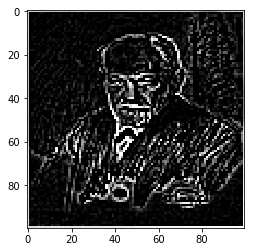

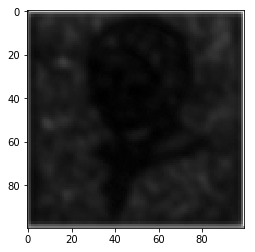

In [15]:
#plot_image = np.concatenate((X_train_data[0][0]*255, Y_train_data[0][0]*255), axis=1)
plt.imshow(X_test_data[0][1][0]*255, cmap = cm.Greys_r)
plt.show()
plt.imshow(pred_data[0][1][0]*255, cmap = cm.Greys_r)
plt.show()

In [ ]:
trainInpGrayImg

In [ ]:
trainInpEdgeImg

In [ ]:
prdImg = Image.fromarray(pred_data[0][0], 'L')
prdImg